In [15]:
import sympy as sp
import numpy as np
from scipy.integrate import solve_ivp as sl
import matplotlib.pyplot as pl
x1,x2 = sp.symbols('x1 x2',real = True)
f =sp.Array([[1/x2-x1**2],[x1/x2-1]])
sp.init_printing()

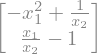

In [16]:
f

In [17]:
rrots = sp.solve(f.tomatrix(),x1,x2)
rrots

Solo tenemos un punto de equilibrio en $(1,1)$

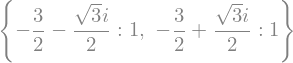

In [18]:

J = f.tomatrix().jacobian([x1,x2])
Jn = J.subs([(x1,1),(x2,1)])
Jn.eigenvals()

In [19]:
V = (x1-1)**2/2 + (x2-1)**2/2
Vdx1 =sp.diff(V,x1)
Vdx2 =sp.diff(V,x2)
grV = sp.Array([[Vdx1],[Vdx2]])
Vdot = grV.tomatrix().T*f.tomatrix()
sp.simplify(Vdot)

Las dos variables están separadas en la derivada, por tanto podemos estudiar cada una por su cuenta en el intervalo de validez $[x_1,x_2] \in \mathbb{R}^2_+$

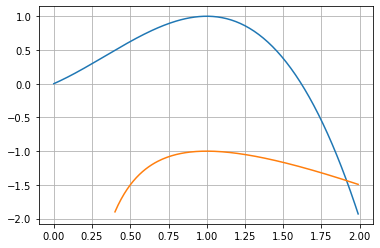

In [20]:
x1n = np.arange(0,2,0.01)
x2n = np.arange(0.4,2,0.01)
dotVx1 = -x1n**3+x1n**2+x1n
dotVx2 = -x2n +1 -1/x2n
pl.plot(x1n,dotVx1)
pl.plot(x2n,dotVx2)
pl.grid()

Es Fácil observar que el mayor valor que va tomar las derivada va a ser 0, justamente en el punto 1. En cualquier otro punto la componente relacionada corn $X_2$ va a dominar haciendo que  la derivada sea siempre negativa. De hecho, podríamos tomar un círculo de radio 1 como región de convergencia, aunque es evidente que toda el primer cuadrante es estable.

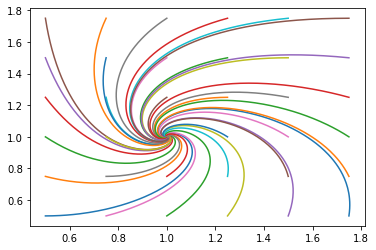

In [21]:
dotx = np.zeros(2)
def chisme(t,x):
    dotx[0] = -x[0] + 1/x[1]
    dotx[1] =  x[0]/x[1] - 1
    return dotx
x01 = np.arange(0.5,2,0.25)
x02 = x01
for i in x01:
    for j in x02:
        #print(chisme(0,np.array([[i],[j]])))
        sol = sl(chisme, (0,5), np.array([i,j]),max_step = 0.01)
        pl.plot(sol.y[0],sol.y[1])